# NEURAL NETWORK CLASSIFICATION WITH TENSORFLOW

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Visualize the data
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


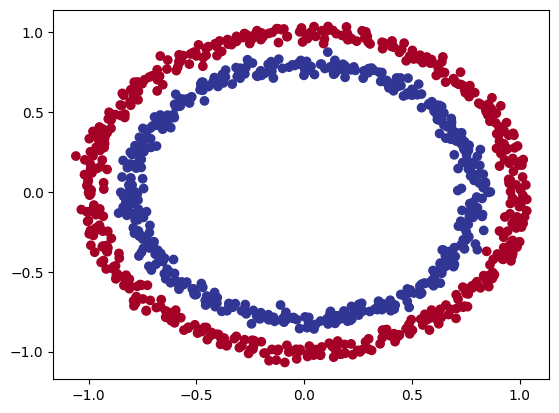

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y,  cmap=plt.cm.RdYlBu)

In [6]:
# Input and Output Shapes
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modeling

* Get data ready ( tur into tensor )
* Build / Pick a pretrained model
* Fit the model to the data and make a prediction
* Evaluate the model
* Save and retain the saved model

# First Model

In [8]:
import tensorflow as tf

# setting the random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_1.fit(X, y, epochs = 100, verbose = 0)

In [9]:
# Evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

In [10]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Second Model
-> Improving our model

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added new layer with 100 neurons
    tf.keras.layers.Dense(10), # added new layer with 10 neurons
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_2.fit(X, y, epochs = 100, verbose = 0)

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5050


[0.6983395218849182, 0.5049999952316284]

## Visualizing our evaluation of second model

In [13]:
# plotting function using plot decision boundary
# Take in a trained model, features X and labels y
# Create a mesh grid of the different X values and make predictions across mesh grid and then finally plot the prediction as well as a line between zones

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary by a model predicting on X.
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X value to make predictions
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class classification
  if len(y_pred[0]) > 1:
    print("We are doing multiclass classification.")

    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("We are doing binary classification.")

    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
We are doing binary classification.


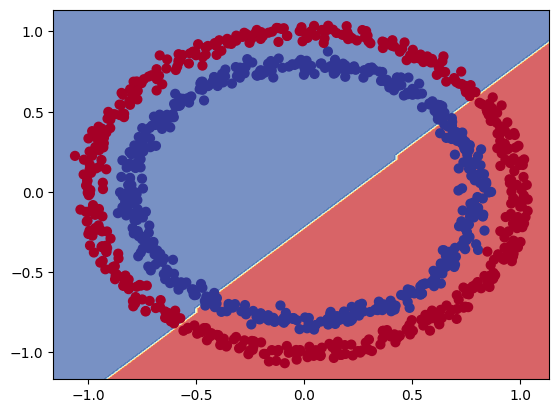

In [15]:
# Check out our predictions our model is making
plot_decision_boundary(model_2, X, y)

### Resource
* [CS231 NN Case Study ] (https://cs231n.github.io/neural-networks-case-study/)
* [Madewith ml]

# Third Model : Non-Linear Activation Function
* Not possible to model with straight line

In [16]:
# random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit
history = model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6211 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5472 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5315 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5047 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5044 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5041 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5038 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5036 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5033 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5031 - accuracy: 0.4770
Epoch 11/

# Fourth Model: Increasing Hidden layers and Neurons

In [17]:
# New model with hidden layers each of 4 neurons

tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_4.fit(X, y, epochs = 100, verbose = 0)

In [18]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9800


[0.1346825808286667, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
We are doing binary classification.


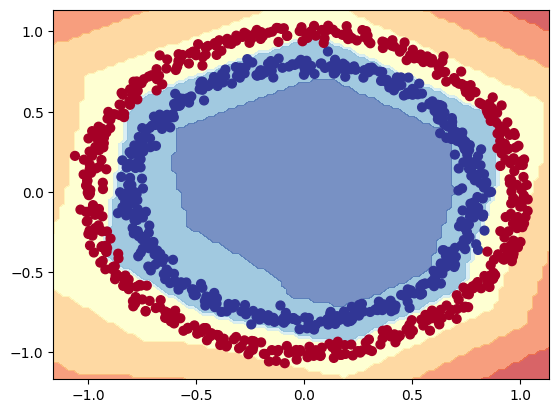

In [19]:
plot_decision_boundary(model_4, X, y)

# Fifth Model: Adding activation function in the outer layer



In [20]:
tf.random.set_seed(42)

# 1. Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile
model_5.compile(
    loss = "BinaryCrossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

# Fit
history = model_5.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.7166 - accuracy: 0.5010
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.4830
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.4720
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.4790
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.4740
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.4620
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4760
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.4660
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4630
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4640
Epoch 11/

In [21]:
# Evaluating fifth model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9820


[0.10229399055242538, 0.9819999933242798]

313/313 [==============================] - 0s 1ms/step
We are doing binary classification.


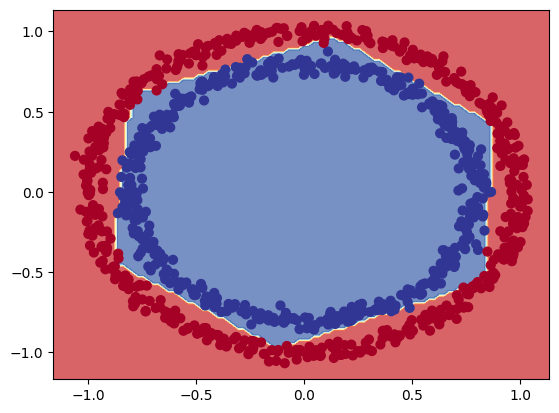

In [22]:
# plotting the decision boundary of the fifth model
plot_decision_boundary(model_5, X, y)

# More Non Linear

In [23]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

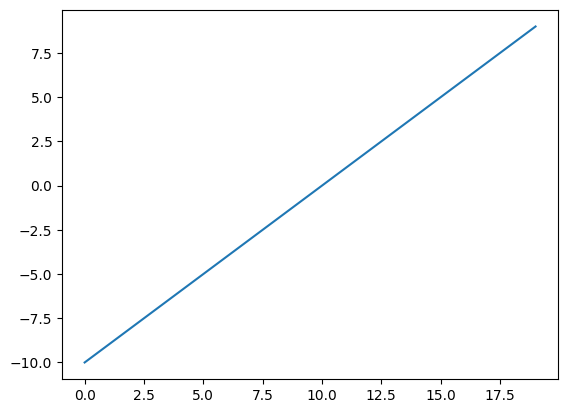

In [24]:
# Visualize our tensor
plt.plot(A)

### Sigmoid

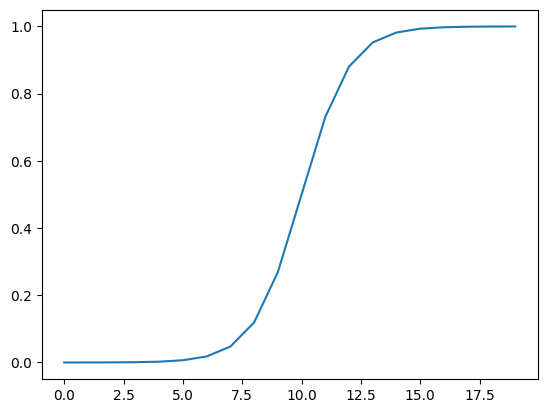

In [25]:
# visualizing sigmoid function
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# using sigmoid function
plt.plot(sigmoid(A))

### Relu

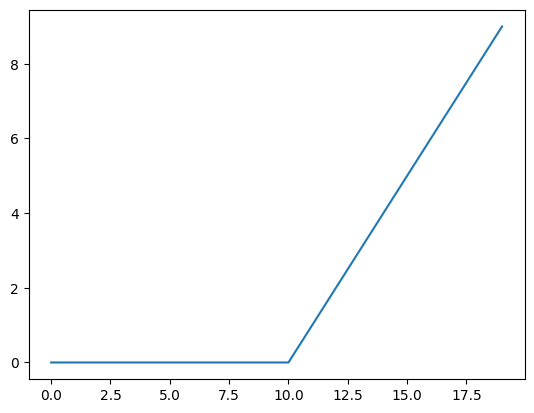

In [26]:
def relu(x):
  return tf.maximum(x, 0)

plt.plot(relu(A))

In [ ]:
# Sixth Model: Tweaking the learning

In [27]:
 # Create training and testing dataset
 len(X), len(y)

(1000, 1000)

In [30]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

# Sixth model : Train test data

In [31]:
# Create model to train our data and evaluate the test data

# radom seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile
model_6.compile(
    loss = "BinaryCrossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

# 3. Fit
history = model_6.fit(X_train, y_train, epochs = 250, verbose = 1)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5213
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5275
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5387
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5612
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5788
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6012
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6363
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6363
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6800
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7837
Epoch 11/

In [32]:
# Model evaluation
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000


[0.003366508986800909, 1.0]

<Axes: >

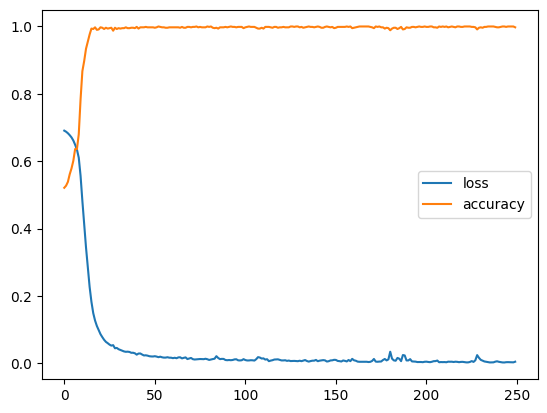

In [33]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 2ms/step
We are doing binary classification.


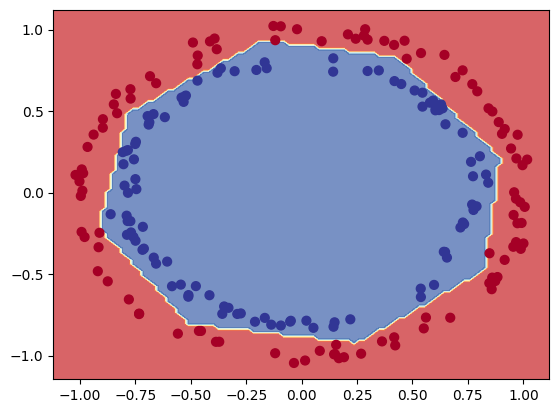

In [34]:
# Plot decision boundary
plot_decision_boundary(model_6, X_test, y_test)

# Seventh Model : Using Callback to find a model ideal learning rate

## Finding the best learning rate

Finding learning rate ( the training rate where loss decreases the most during training )

* A learning rate **callback**
* A modified loss curve plot

In [36]:
# random state
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_7.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7230 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epoch'>

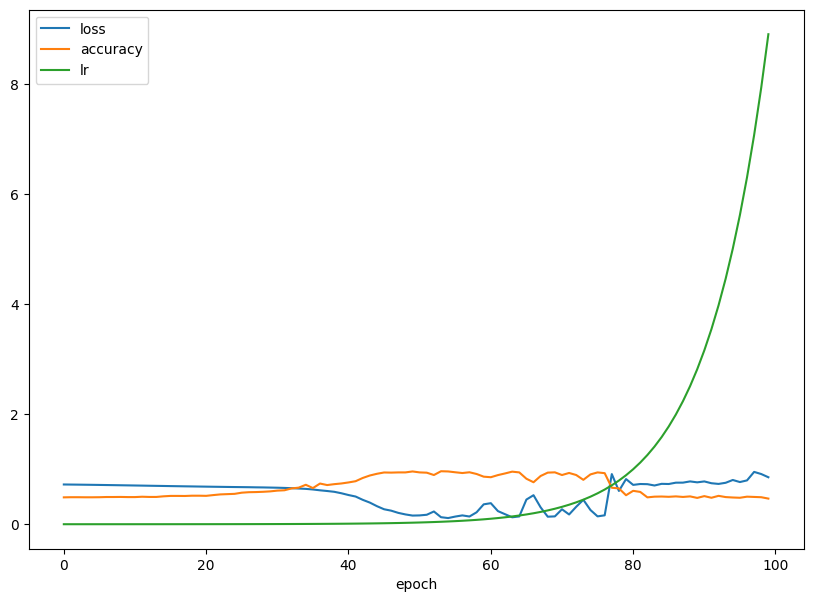

In [37]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel = "epoch")

[]

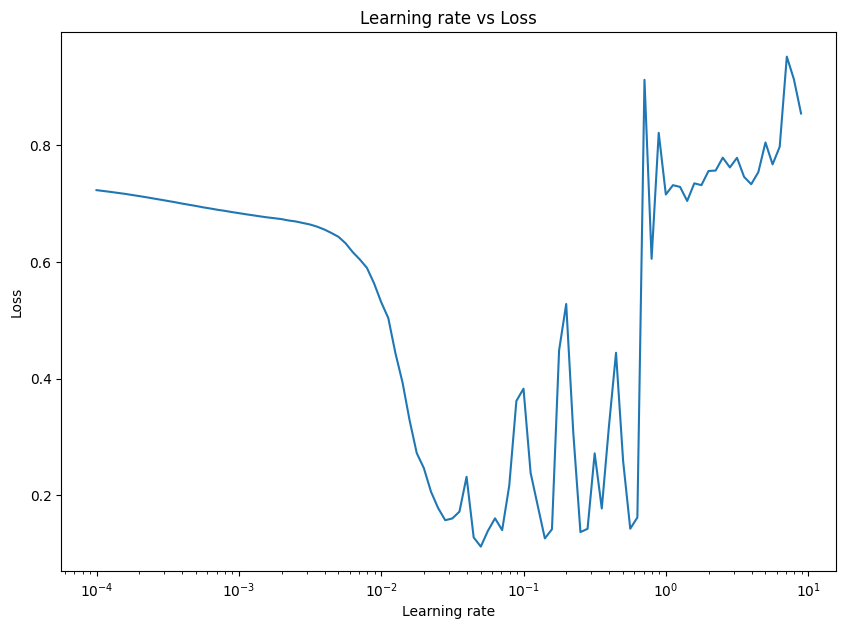

In [39]:
# Plotting the learning rate vs loss

lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(history.history["lr"], history.history["loss"]) # or use lrs
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.plot()

# Choose learning rate where the loss decreases fast

# Eight Model : Learning rate

In [42]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_8.compile(
    loss = "BinaryCrossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = ["accuracy"]
)

history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4787
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5238
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5300
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5987
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6313
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6313
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6988
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7475
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.8000
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8963
Epoch 11/25
25/25 [

In [43]:
# evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.9900


[0.03740739822387695, 0.9900000095367432]

<Axes: >

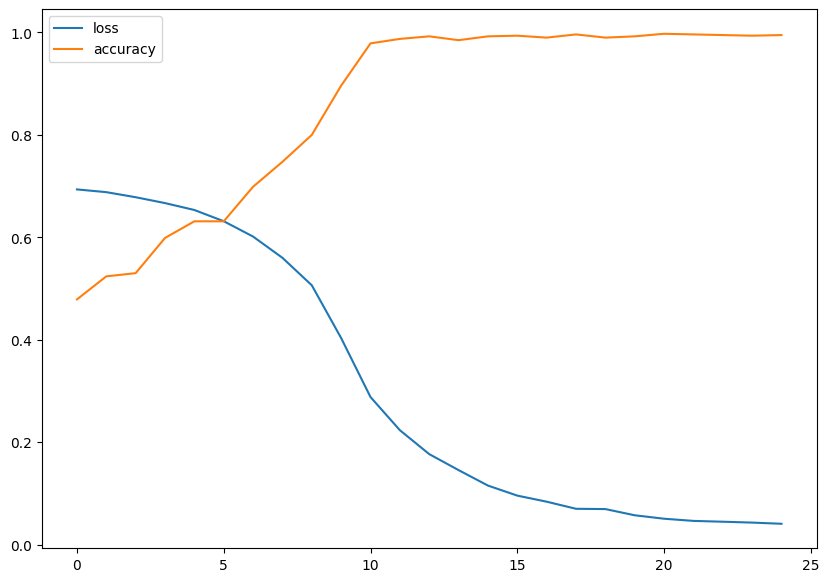

In [44]:
pd.DataFrame(history.history).plot(figsize=(10,7))

313/313 [==============================] - 1s 2ms/step
We are doing binary classification.


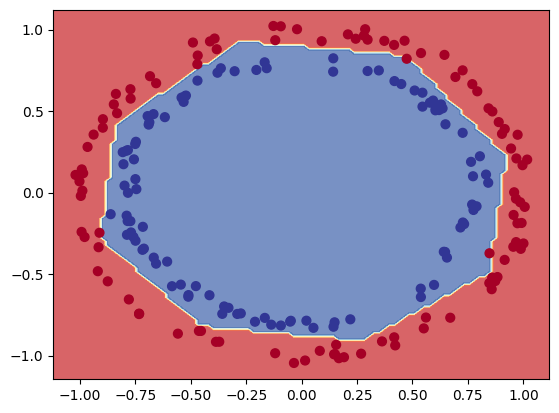

In [45]:
plot_decision_boundary(model_8, X_test, y_test)

# Classification evaluation methods


* tp = True Positive ( Model predicts 1 when the truth is 1 )
* tn = True Negative ( Model predicts 0 when the truth is 0 )
* fp = False Positive ( Model predicts 1 when the truth is 0 )
* fn = False Negative ( Model predicts 0 when the truth is 1 )

**Metrics**
1. Accuracy : Default metric for classification problems. Not the best for imbalance classes
2. Precision : Higher precision leads to less false positives
3. Recall : Higher recall leads to less false negatives
4. F1-Score : Combination of Precision and Recall
5. Confusion Matrix: When comparing predictions to truth labels to see where model gets confused. Can be hard to use with more number of classes

## Finding accuracy of our classification model

In [46]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9900
Model loss on the test set:0.03740739822387695
Model accuracy on the test set99.00%


## Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)

y_preds[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.9762588 ],
       [0.9762588 ],
       [0.9762588 ],
       [0.9762588 ],
       [0.6103387 ],
       [0.00227811],
       [0.9762588 ],
       [0.00183394],
       [0.9762588 ],
       [0.00127988]], dtype=float32)

Predictions array in prediction probability form so change this to 0 or 1
> This is due to the sigmoid activation function at the outer layer

In [50]:
# convert probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [51]:
# confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

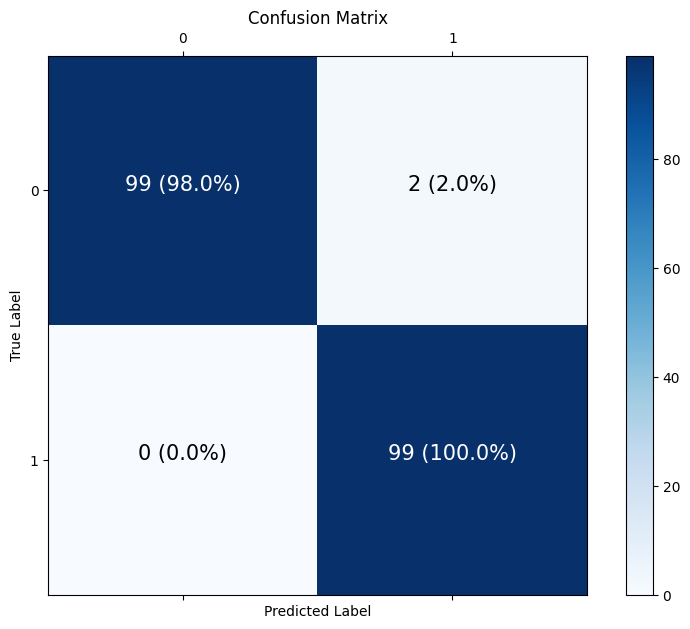

In [58]:
# visualizing confusion matrix

import itertools

figsize = (10,7)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]

n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

threshold = (cm.max() + cm.min()) / 2

# Plot the text

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment="center",
           color="white" if  cm[i, j] > threshold else "black",
           size = 15)